In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import nibabel as nib

from scipy.ndimage.interpolation import rotate
from scipy.ndimage.interpolation import shift

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
ct = np.load('C:\\Users\\Heeguen\\Desktop\\heeguen\\Dental_panorama_2020\\np_data\\register_ct.npy')
trans_ct = np.transpose(ct, (0, 3, 1, 2))
print(trans_ct.shape)

(6, 424, 671, 671)


In [3]:
def show(x, y, z):
    plt.figure(figsize=(24,12))
    plt.subplot(121)
    plt.imshow(trans_ct[x, y, ...], cmap='gray')
    
    plt.subplot(122)
    plt.imshow(np.rot90(ct[x, z, ...]), cmap='gray')    
    
interact(show, x=widgets.IntSlider(min=0, max=(trans_ct.shape[0]-1), step=1,value=0), 
         y=widgets.IntSlider(min=0, max=(trans_ct.shape[1]-1), step=1,value=100), 
         z=widgets.IntSlider(min=0, max=(ct.shape[1]-1), step=1,value=300))

interactive(children=(IntSlider(value=0, description='x', max=5), IntSlider(value=100, description='y', max=42…

<function __main__.show(x, y, z)>

In [4]:
sam = trans_ct[:, 20:200, 30:, :600]

print('after processing : ', sam.shape)

after processing :  (6, 180, 641, 600)


In [5]:
def show1(x, y, z):
    plt.figure(figsize=(24,12))
    plt.subplot(121)
    plt.imshow(sam[x, y, ...], cmap='gray')
    
    plt.subplot(122)
    plt.imshow(np.rot90(sam[x, z, ...]), cmap='gray')    
    
interact(show1, x=widgets.IntSlider(min=0, max=(sam.shape[0]-1), step=1,value=0), 
         y=widgets.IntSlider(min=0, max=(sam.shape[1]-1), step=1,value=0), 
         z=widgets.IntSlider(min=0, max=(sam.shape[1]-1), step=1,value=0))

interactive(children=(IntSlider(value=0, description='x', max=5), IntSlider(value=0, description='y', max=179)…

<function __main__.show1(x, y, z)>

In [5]:
ct_sum = np.zeros((sam[0].shape))

for s in range(sam.shape[0]):
    ct_sum += sam[s]
    
ct_sum.shape

(180, 641, 600)

In [6]:
sam[0].min()

tmp = sam[0] 

# tmp_ = tmp - tmp.min()


In [8]:
# ct_sum_ = ct_sum - sam[0].min()
tmp_ = tmp - tmp.min()

angles = np.arange(0, 190, 10)
rot = []
for angle in angles:
    print(angle)
    rot_tmp = rotate(tmp_, angle, axes=(1,2), reshape=False)
    
    rot.append(rot_tmp)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180


In [9]:
def show2(x, y):
    plt.figure(figsize=(24,12))
    plt.subplot(121)
    plt.imshow(sam[0, y, ...], cmap='gray')
    
    plt.subplot(122)
    plt.imshow(rot[x][y, ...], cmap='gray')    
    
interact(show2, x=widgets.IntSlider(min=0, max= (len(rot)-1), step=1,value=0), 
         y=widgets.IntSlider(min=0, max=(rot[0].shape[0]-1), step=1,value=0))

interactive(children=(IntSlider(value=0, description='x', max=18), IntSlider(value=0, description='y', max=179…

<function __main__.show2(x, y)>

</br>

# sample들의 표준 악궁의 궤적을 통해, 이 점들이 회전하였을 때 얼마 만큼의 이동이 있을지 확인해 보자 

## -> 차후, 이를 통해 sample의 정도를 파악

</br>

# sample의 대표 악궁 궤적

In [19]:
import cv2

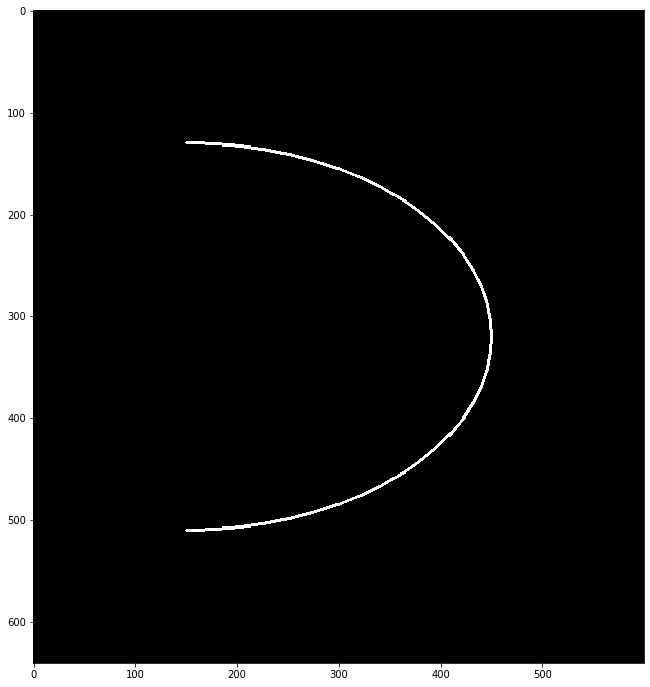

In [20]:
img = np.ones((641, 600))
ellip = cv2.ellipse(img, (150, 320), (300,190), 0, -90, 90, (255,0,0), 2)

plt.figure(figsize=(12,12))
plt.imshow(ellip, cmap='gray')

</br>

## 점의 이동 계산

In [7]:
import math

def p_rotate(origin, point, angle):
    
    rad = angle*(math.pi/180)
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(rad) * (px - ox) - math.sin(rad) * (py - oy)
    qy = oy + math.sin(rad) * (px - ox) + math.cos(rad) * (py - oy)
#     return qx, qy
    return qx, qy

In [65]:
a = (150, 510)
c = (300, 320)

print(round(p_rotate(c, a, 10)))

TypeError: type tuple doesn't define __round__ method

In [22]:
pa = (150, 510)
pb = (150, 130)
pc = (450, 320)
origin = (300, 320)

for i in range(len(angles)) :
    if angles[i] <= 10 :
        print('b-a = ', p_rotate(origin, pb, angles[i]) - p_rotate(origin, pa, angles[i]))
    
    elif angles[i] > 10 and angles[i] != 180:
        print('b - b" ',p_rotate(origin, pb, angles[i+1]) - p_rotate(origin, pb, angles[i]))
        
    elif angles[i] == 180:
        print(angles[i],' end')

b-a =  0.0
b-a =  65.98630751343353
b - b"  41.066255318343394
b - b"  42.126789940261574
b - b"  41.90732336702911
b - b"  40.41452397941845
b - b"  37.69374973142891
b - b"  33.82766997180772
b - b"  28.93375357772004
b - b"  23.160699722359027
b - b"  16.683919725813894
b - b"  9.700207270870465
b - b"  2.4217589265433617
b - b"  -4.930273337297535
b - b"  -12.132501740623411
b - b"  -18.966090217902433
b - b"  -25.22340364121544
b - b"  -30.714316708547926
180  end


</br>

## 회전 + 점의 차이 계산식 추가

In [17]:
pa = (150, 510)
pb = (150, 130)
pc = (450, 320)
origin = (300, 320)

tmp = sam[0] 
tmp_ = tmp - tmp.min()

max_ang = 180
step = 5
angles = np.arange(0, (max_ang + step), step)
# sum_ = 10 # 보상값

pano = []
xs = []
xba = []
c = 1
for i in range(len(angles)) :
    rot_tmp = rotate(tmp_, angles[i], axes=(1,2), reshape=False)
    if angles[i] == 0:
        print('original image')
        pass
    
    elif angles[i] == step :
        b_x = round(abs(p_rotate(origin, pb, angles[i])[0]))
        a_x = round(abs(p_rotate(origin, pa, angles[i])[0]))
        print('b = ', b_x, 'a = ', a_x)
        xba= [(2*origin[0] - b_x), (2*origin[0] - a_x)]
        pano.append(rot_tmp[..., a_x:(b_x-step) ])
        
    
    elif angles[i] > step and angles[i] < 60:
        b_x_ = round(abs(p_rotate(origin, pb, angles[i-2])[0]))
        b_x = round(abs(p_rotate(origin, pb, angles[i])[0]))
        print('bx = ',b_x_, 'bx3 = ', b_x)
        
        pano.append(rot_tmp[..., b_x_:b_x])
        
        if b_x > origin[0] :
            xs.append([(2*origin[0] - b_x), (2*origin[0] - b_x_)])
            
        elif b_x < origin[0] :
            xs.append([(2*origin[0] - b_x_), (2*origin[0] - b_x)])
            
    elif angles[i] >= 60 and angles[i] <= 120:
        
        min_ = origin[0] - 10
        max_ = origin[0] + 10
        pano.append(rot_tmp[..., min_:max_])
    
    elif angles[i] > 120 and angles[i] < 170:
        b_x_, b_x = xs[-c]
        if b_x_ < 300 :
            pano.append(rot_tmp[..., b_x_:b_x]) 
            print('bx = ',b_x_, 'bx3 = ', b_x)
        else:
            pano.append(rot_tmp[..., b_x:b_x_]) 
            print('bx = ',b_x_, 'bx3 = ', b_x)
        c += 1
        
    elif angles[i] == 170:
        b_x, a_x = xba
        pano.append(rot_tmp[..., b_x:a_x ])
        
    elif angles[i] == 180:
        print(angles[i],' end')
        
# pano_ = np.array(pano)   

original image
b =  167 a =  134
bx =  150 bx3 =  185
bx =  167 bx3 =  204
bx =  185 bx3 =  224
bx =  204 bx3 =  244
bx =  224 bx3 =  265
bx =  244 bx3 =  286
bx =  265 bx3 =  307
bx =  286 bx3 =  328
bx =  307 bx3 =  349
bx =  328 bx3 =  370
bx =  230 bx3 =  272
bx =  251 bx3 =  293
bx =  272 bx3 =  314
bx =  293 bx3 =  335
bx =  356 bx3 =  314
bx =  376 bx3 =  335
bx =  396 bx3 =  356
bx =  415 bx3 =  376
bx =  433 bx3 =  396
180  end


In [9]:
pano_ = pano[0]

for p in range(len(pano)-1):
    pano_ = np.concatenate((pano_, pano[p+1]), axis=2)
    
tot = np.array(pano_)
print(tot.shape)

(180, 641, 904)


In [10]:
for p in range(len(pano)):
    print(pano[p].shape)

(180, 641, 56)
(180, 641, 74)
(180, 641, 80)
(180, 641, 83)
(180, 641, 84)
(180, 641, 20)
(180, 641, 20)
(180, 641, 20)
(180, 641, 20)
(180, 641, 20)
(180, 641, 20)
(180, 641, 20)
(180, 641, 84)
(180, 641, 83)
(180, 641, 80)
(180, 641, 74)
(180, 641, 66)


In [19]:
def show3(x):
    plt.figure(figsize=(24,12))
    plt.subplot(121)
    plt.imshow(tmp_[x, ...], cmap='gray') 
    
    plt.subplot(122)
    plt.imshow(tot[x, ...], cmap='gray')  
    
interact(show3, x=widgets.IntSlider(min=0, max= (tot.shape[0]-1), step=1,value=0))

interactive(children=(IntSlider(value=0, description='x', max=179), Output()), _dom_classes=('widget-interact'…

<function __main__.show3(x)>

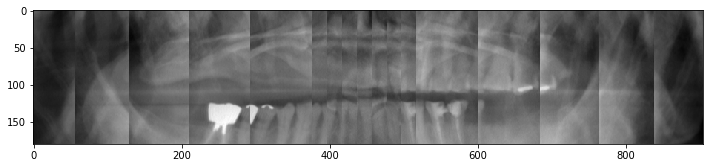

In [11]:
trans_t = np.transpose(tot, (1,0,2))
tot_sum = np.zeros((trans_t.shape[1], trans_t.shape[2]))

for s in range(trans_t.shape[0]):
    tot_sum += trans_t[s]

tot_ = np.flipud(tot_sum)
plt.figure(figsize=(12, 8))
plt.imshow(tot_, cmap='gray')

</br>

# 20200409

# 이미지 형태로 다루기 위해 gray image로 만든다.

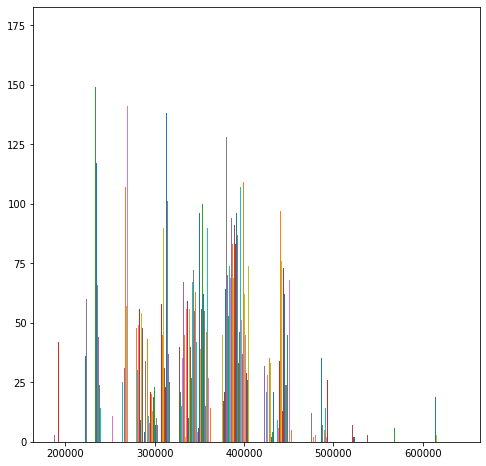

In [21]:
# 이어 붙였던 2d projection image의 histogram 
plt.figure(figsize=(8,8))
hist = plt.hist(tot_, range=(tot_.min(), tot_.max()))
plt.show()

In [12]:
lim_min = 200000
lim_max = 550000

tot_g = np.zeros((tot_.shape[0], tot_.shape[1]))

for h in range(tot_.shape[0]):
    for w in range(tot_.shape[1]):
        if tot_[h,w] < lim_min:
            tot_g[h,w] = 0
            
        elif tot_[h,w] > lim_max:
            tot_g[h,w] = 255
        
        else:
            tot_g[h,w] = round(((tot_[h,w] - lim_min)/lim_max)*255)

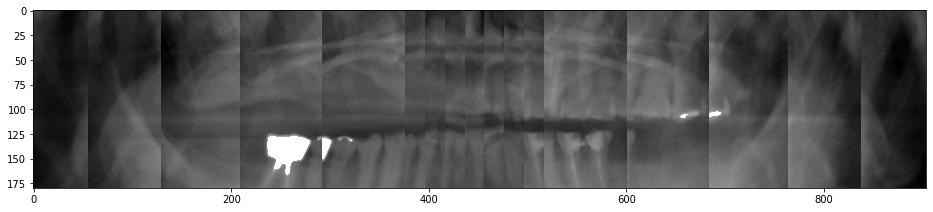

In [13]:
plt.figure(figsize=(16,10))

# plt.subplot(211)
plt.imshow(tot_g, cmap='gray')

# plt.subplot(212)
# plt.imshow(tot_g2, cmap='gray')
plt.show()

print(tot_g.shape)

In [14]:
part=[]
a=0
for p in range(len(pano)):
    b = pano[p].shape[2]
    part.append(tot_g[:, a:a+b])
    a+=b
    
print(len(part))

17


In [15]:
root = 'C:\\Users\\Heeguen\\Desktop\\heeguen\\Dental_panorama_2020'
os.makedirs(root+'/image_parts', exist_ok=True)

for i in range(len(part)):
    np.save(root+'/image_parts/part_%02d.npy'%i, part[i])
    print(root+'/image_parts/part_%02d.npy'%i)
    print(part[i][..., np.newaxis].shape)

C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_00.npy
(180, 56, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_01.npy
(180, 74, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_02.npy
(180, 80, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_03.npy
(180, 83, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_04.npy
(180, 84, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_05.npy
(180, 20, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_06.npy
(180, 20, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_07.npy
(180, 20, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_08.npy
(180, 20, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_09.npy
(180, 20, 1)
C:\Users\Heeguen\Desktop\heeguen\Dental_panorama_2020/image_parts/part_10.npy
(180, 20, 1)

In [16]:
part[0].min()

4.0